# Chapter 03 - Simple Linear Regression

## Simple Linear Regression

* Simple linear (straight-line) models
* Method of least squares

#### Question

Given a dependent variable, and a single independent variable, does an exact (deterministic) relationship exist between them?

* Typically two factors underlying an answer of "No":
	* The dependent variable depends on other, additional independent variables not included in the model.
    * There is variation in the dependent variable due to strictly random phenomena that cannot be modeled or explained.


\begin{equation}
y = E(y) + \epsilon
\end{equation}

* $\epsilon$ : represents all unexplained variation caused by important but omitted variables and unexplainable random phenomena

### First-Order Linear (straight-line) Model

\begin{equation}
y = \beta_0 + \beta_1x + \epsilon
\end{equation}
  
* $y$ : dependent variable
* $x$ : independent variable
* $E(y) = \beta_0 + \beta_1x$ : deterministic component
  * "line of means"
* $\epsilon$ : random error component
* $\beta_0$ : y-intercept of the line
* $\beta_1$ : slope of the line

<div class="alert alert-info">
<b>Best Practice:</b> Generate a scatterplot of $x$ against $y$ to gain some information on the relationship and approximate values of the $\beta$ parameters.
</div>

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import math

from pandas import Series,DataFrame

import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# load the data
datapath = "./data/ch03/warehouse.dat"
df = pd.read_fwf(datapath, names=["vehicles", "time"], colspecs="infer")

# define the independent and dependent variables
xCol = 'vehicles'
yCol = 'time'

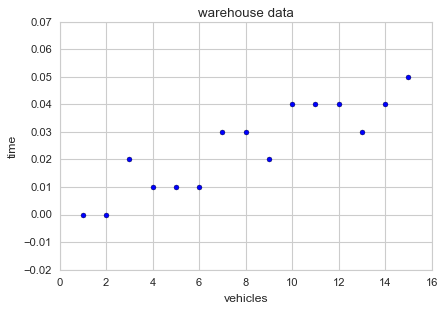

In [4]:
figure1 = plt.scatter(df[xCol], df[yCol])
plt.xlabel(xCol)
plt.ylabel(yCol)
plt.title("warehouse data");

### Residuals

Given a straight line on the scatterplot, **residuals** are errors of prediction, the difference between each observed and predicted value of $y$.

* "residual" = "deviation" = "error"  

#### $i$th residual
\begin{equation}
(y_i - \hat{y}_i) = y_i - (\hat{\beta}_0 + \hat{\beta}_1x_i)
\end{equation}

#### SE
\begin{equation}
\sum_{i=1}^n (y_i - \hat{y}_i)
\end{equation}

* sum of errors (deviations)
* Many lines can be placed that generate $SE = 0$

#### SSE
\begin{equation}
\sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation}

* sum of squares of the errors (residuals)  
* gives greater emphasis to large deviations  

### Least Squares Line

One, and only one line can be placed that minimizies $SSE$.

The **least squares line** is one that satisfies the following two properties:

* $SE = 0$
  * The sum of the residuals is 0.
* $SSE$ is minimum
  * The sum of squared errors is smaller than for any other straight-line model with $SE = 0$.


#### Equation of the least squares line

\begin{equation}
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x
\end{equation}

* $\hat{y}$ : predicted $y$ value
* $\hat{\beta}_0$
  * least square estimate of population parameter $\beta_0$ that minimizes $SSE$
  * $y$-intercept
* $\hat{\beta}_1$
  * least square estimate of population parameter $\beta_1$ that minimizes $SSE$
  * slope

#### SSxy

\begin{equation}
SS_{xy} = \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
\end{equation}

* equivalent to $(n-1)Cov_{sample}(x,y)$

In [5]:
# display the covariance matrix
df.cov()

,vehicles,time
vehicles,20.000000,0.064286
time,0.064286,0.000255


In [6]:
# calculate variances
covariance_xy = df.cov()[xCol][yCol]
variance_x = df[xCol].var()
variance_y = df[yCol].var()

n = len(df)

print("Cov(x,y) = ", covariance_xy)
print("Var(x) = ", variance_x)
print("Var(y) = ", variance_y)
print("n = ", n)

Cov(x,y) =  0.0642857142857
Var(x) =  20.0
Var(y) =  0.00025523809523809527
n =  15


In [7]:
SSxy = covariance_xy * (n - 1)
print("SSxy = ", SSxy)

SSxy =  0.9


#### SSxx

\begin{equation}
SS_{xx} = \sum_{i=1}^n (x_i - \bar{x})^2
\end{equation}

* equivalent to $(n-1)Var_{sample}(x)$

In [8]:
SSxx = variance_x * (n - 1)
print("SSxx = ", SSxx)

SSxx =  280.0


#### $\beta_1$ Least Squares Estimate

\begin{equation}
\hat{\beta}_1 = \frac{SS_{xy}}{SS_{xx}}
\end{equation}

* For first-order linear model, this is equivalent to $\frac{Cov(x,y)}{Var(x)}$

In [9]:
# Slope (beta-hat-1) = SSxy / SSxx
beta1 = SSxy / SSxx
print("Beta^1 = ", beta1)

Beta^1 =  0.00321428571429


#### $\beta_0$ Least Squares Estimate

\begin{equation}
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}
\end{equation}

In [10]:
# calculate means of x and y
xBar = df[xCol].mean()
yBar = df[yCol].mean()

print("xBar = ", xBar)
print("yBar = ", yBar)

# intercept (beta-hat-0) = yBar - beta1 * xBar
beta0 = yBar - (beta1 * xBar)
print("Beta^0 = ", beta0)

xBar =  8.0
yBar =  0.024666666666666667
Beta^0 =  -0.00104761904762


### Interpretation of $\hat{\beta}$ Parameters

* $\hat{\beta}_1$ : The mean of $y$ will increase/decrease $\hat{\beta}_1$ units for every 1-unit increase in $x$.
* $\hat{\beta}_0$ : When $x$ equals 0, the estimated mean $y$ is $\hat{\beta}_0$.

* **extrapolation** : Making predictions outside the range of the sample data.

<div class="alert alert-info">
<b>Key Point: </b> Only when $x = 0$ is within the range of $x$-values in the sample data and is a practical value will $\hat{\beta}_0$ have a meaningful interpretation.
</div>

<div class="alert alert-info">
<b>Key Point: </b> Even when the interpretations of the estimated parameters are meaningful, we need to remember that they are only estimates based on the sample.
</div>

In [11]:
# calculate predicted y-values
y_hat = beta0 + beta1 * df[xCol]
y_hat

0     0.002167
1     0.005381
2     0.008595
3     0.011810
4     0.015024
5     0.018238
6     0.021452
7     0.024667
8     0.027881
9     0.031095
10    0.034310
11    0.037524
12    0.040738
13    0.043952
14    0.047167
Name: vehicles, dtype: float64

### Model Assumptions

Four basic assumptions about the general form of the probability distribution of $\epsilon$:

1. The mean of the probability distribution of $\epsilon$ is 0.
2. The variance of the probability distribution of $\epsilon$ is constant for all settings of the independent variable $x$.
3. The probability distribution of $\epsilon$ is normal.
4. The errors associated with any two different observations are independent.


* various diagnostic techniques exist for checking the validity of these assumptions
* it is essential that we apply these diagnostic tools in every regression analysis

#### SSyy

\begin{equation}
SS_{yy} = \sum_{i=1}^n (y_i - \bar{y})^2
\end{equation}

* equivalent to $(n-1)Var_{sample}(y)$

In [12]:
SSyy = variance_y * (n - 1)
print("SSyy = ", SSyy)

SSyy =  0.0035733333333333337


### An Estimator of $\sigma^2$

Reasonable assumption:

* the greater the variability of $\epsilon$ (measured by its variance, $\sigma^2$):
    * the greater will be the errors in the estimation of $\beta_0$ and $\beta_1$
    * the greater will be the errors of prediction when $\hat{y}$ is used to predict $y$ for some $x$

* $\sigma^2$ is typically unknown
  * best estimate is $s^2$

In [13]:
# residuals
# y - y_hat
residuals = df[yCol] - y_hat
residuals

0    -0.002167
1    -0.005381
2     0.011405
3    -0.001810
4    -0.005024
5    -0.008238
6     0.008548
7     0.005333
8    -0.007881
9     0.008905
10    0.005690
11    0.002476
12   -0.010738
13   -0.003952
14    0.002833
dtype: float64

In [14]:
# sum of errors (SE) must equal 0
SE = residuals.sum()
print("SE = ", SE)

SE =  1.0408340855860843e-17


#### SSE

\begin{equation}
SSE = SS_{yy} - \hat{\beta}_1SS_{xy}
\end{equation}

In [15]:
# sum of squared errors (SSE) should be minimized

## calculate first via the actual residual values
SSE1 = (residuals * residuals).sum()
print("SSE (v1) = ", SSE1)

SSE (v1) =  0.0006804761904761908


In [16]:
## calculate using the alternate formula
SSE2 = SSyy - beta1 * SSxy
print("SSE (v2) = ", SSE2)

SSE (v2) =  0.000680476190476


#### Estimate of $\sigma^2$ : $s^2$ (MSE)

\begin{equation}
s^2 = \frac{SSE}{df}
\end{equation}

* df for error is $n - 2$
* (1 for $y$-intercept, 1 for slope)

In [17]:
# mean squared error (s^2) = SSE / (df for error)  = SSE / (n-2)
MSE = SSE1 / (n-2)
print("s^2 (MSE) = ", MSE)

s^2 (MSE) =  5.234432234432237e-05


#### s (RMSE)

* estimated standard error of the regression model
* Root MSE
* interpretation: we expect most (~95%) of the observed $y$-values to lie within $2s$ of their respective least squares predicted values, $\hat{y}$.

In [18]:
# RMSE (s)
RMSE = math.sqrt(MSE)
print("s (RMSE) = ", RMSE)
print("we expect the observed y-value to lie within %f of the predicted y value" % (2 * RMSE,))

s (RMSE) =  0.007234937618550858
we expect the observed y-value to lie within 0.014470 of the predicted y value


#### Coefficient of variation (CV)

* The ratio of standard of error to sample mean of $y$

\begin{equation}
CV = 100 (s / \bar{y})
\end{equation}

In [19]:
# coefficient of variation (CV)
cv = 100 * (RMSE / yBar)
print("CV = ", cv)

CV =  29.33082818331429


<div class="alert alert-info">
  <b>Rule of Thumb:</b> We typically want a regression model with CV values of 10% or smaller; this, in turn, typically leads to more precise predictions.
</div>

### Assessing Model Utility : Inferences about $\beta_1$

* Suppose that independent and dependent variables are completely unrelated.
	* i.e. x contributes no information for the prediction of y
* Implies that $E(y) = \beta_0 + \beta_1x$ does not change as $x$ changes
* This means that $\beta_1 = 0$, leading to:
  * $H_0: \beta_1 = 0$
  * $H_a: \beta_1 \neq 0$

#### Sampling Distribution of $\hat{\beta}_1$

* normal
* mean:  $\beta_1$ (true slope)
* std dev: $\sigma_{\hat{\beta}_1} = \frac{\sigma}{\sqrt{SS_{xx}}}$

* $\sigma$ typically unknown

#### Estimate of $\sigma_{\beta_1}$

\begin{equation}
s_{\hat{\beta}_1} = \frac{s}{\sqrt{SS_{xx}}}
\end{equation}

In [20]:
# sampling distribution of beta1-est
# mean will be true beta1
# sd will = RMSE / sqrt(SSxx)
sBeta1 = RMSE / math.sqrt(SSxx)
print("s_Beta^1 = ", sBeta1)

s_Beta^1 =  0.0004323702214220816


#### Test Statistic (Student's t)

\begin{eqnarray*}
t &=& \frac{\hat{\beta}_1 - (\text{hypothesized value of } \beta_1)}{s_{\hat{\beta}_1}}\\ 
&=& \frac{\hat{\beta}_1 - 0}{s_{\hat{\beta}_1}}\\
&=& \frac{\hat{\beta}_1}{s_{\hat{\beta}_1}}
\end{eqnarray*}

* $df = (n - 2)$ for straight-line model

In [21]:
# calculate test statistic 
t = beta1 / sBeta1
print("t = ", t)

t =  7.43410520668


#### Two-Tailed Test

* Rejection Region: $|t| > t_{\alpha/2}$
* p-value:
  * $2P(t > t_c) \text{ if } t_c > 0$
  * $2P(t < t_c) \text{ if } t_c < 0$

In [22]:
# figure out our rejection region
alpha = 0.05
tRej = st.t.ppf(1 - (alpha / 2), n - 2)
tRej

2.1603686564610127

In [23]:
# since t falls in the upper-tail rejection region, we can reject the null hypothesis

### 100 ($1-\alpha$)% C.I. for $\beta_1$ (Simple Linear Model)

\begin{equation}
\hat{\beta}_1 \pm (t_{\alpha/2})s_{\hat{\beta}_1}
\end{equation}

* $t_{\alpha/2}$ based on $df = n - 2$

In [24]:
# generate a confidence interval for our beta^1 param
# beta1 +/- tRej * sBeta1
ciLow = beta1 - tRej * sBeta1
ciHigh = beta1 + tRej * sBeta1
print("[%f, %f]" %(ciLow, ciHigh))

[0.002280, 0.004148]


### Pearson Product Moment Coefficient of Correlation

\begin{eqnarray*}
r &=& \frac{SS_{xy}}{\sqrt{SS_{xx}SS_{yy}}}\\
&=& \frac{Cov_{xy}}{\sqrt{Var_{x}Var_{y}}}
\end{eqnarray*}

* a quantitative measure of the strength of the linear relationship between $x$ and $y$
* scaleless: $[-1, 1]$
* only useful in cases of _linear relationship_
* note: $r$ applies to the sample; the population correlation coefficient is $\rho$

### Coefficient of Determination

\begin{eqnarray*}
r^2 &=& \frac{\text{explained sample variability}}{\text{total sample variability}}\\
&=& \frac{SS_{yy} - SSE}{SS_{yy}}\\
&=& 1 - \frac{SSE}{SS_{yy}}
\end{eqnarray*}

* practical interpretation: proportion of sample variability of $y$-values explained by the linear relationship between $x$ and $y$

### Sampling Error for Estimator of the Mean of $y$ at $x = x_p$

\begin{equation}
\sigma_{\hat{y}} = \sigma\sqrt{\frac{1}{n} + \frac{(x_p -\bar{x})^2}{SS_{xx}}}
\end{equation}

* $\sigma_{\hat{y}}$ is refered to as the **standard error of $\hat{y}$**

### Sampling Error for Predictor of $y$ at $x = x_p$

\begin{equation}
\sigma_{(y-\hat{y})} = \sigma\sqrt{1+\frac{1}{n} + \frac{(x_p -\bar{x})^2}{SS_{xx}}}
\end{equation}

* $\sigma_{(y-\hat{y})}$ is refered to as the **standard error of prediction**

### 100 ($1-\alpha$)% C.I. for Mean Value of $y$ at $x = x_p$

\begin{equation}
\hat{y} \pm (t_{\alpha/2})s\sqrt{\frac{1}{n} + \frac{(x_p -\bar{x})^2}{SS_{xx}}}
\end{equation}

* $df = n - 2$

### 100 ($1-\alpha$)% C.I. for Prediction of $y$ at $x = x_p$

\begin{equation}
\hat{y} \pm (t_{\alpha/2})s\sqrt{1 + \frac{1}{n} + \frac{(x_p -\bar{x})^2}{SS_{xx}}}
\end{equation}

* $df = n - 2$

* error of estimation and error of prediction both take their smallest values at $x_p = \bar{x}$
* C.I. width decreases as $n$ increases:
  * for estimation, precision will continue to improve with increases in $n$
  * for prediction, there is a lower bound: $\hat{y} \pm z_{\alpha/2}\sigma$

### Steps to Follow in a Simple Linear Regression Analysis

1. hypothesize a probabilistic model - **first-order (straight line) model**: $y = \beta{}_0 + \beta{}_1 x + \epsilon{}$
2. collect the **sample** of (x,y) pairs
3. use least squares method to **estimate the unknown $\beta$ parameters**
4. specify the probability distribution of the **random error component ($\epsilon$)**
5. assess the utility of the hypothesized model:
    * inferences about **slope $\beta{}_1$**
    * interpret coefficient of correlation ($\r$)
    * interpret coefficient of determination ($\r^2$)
6. use model to estimate mean value of $y$ or predict an individual $y$ value    